<a id="2"></a>
<h1 style='background:#b9f2ff; border:0; color:black'><center>Diamonds Price Prediction Dataset</center></h1> 

The purpose of this project is to get a basic idea of how to go ahead with Machine Learning and Analytics Projects.
For any ML Project there is a sequence of steps that every programmer should follow.
![Machine Learning Flow](ml.jpeg)

<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Get Data</center></h3> 

In [1]:
#importing library


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset


df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Let us get some basic information of our dataset, to understand it better

#Shape of our dataset
df.shape

(53940, 10)

In [4]:
#As we can see, our dataset has 53,940 columns and 10 attributes which consists of 9 independant and 1 dependant variable

#Let us get some attribute information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Structure of a diamond look something like this
![Diamond Strucutre](diamondstruct.jpg)

<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Dataset Attribute Description</center></h3> 

One of the most important part of Machine Learning is to have a good understanding of our dataset. In order to analyse or model our data we must first be aware of what it represents. This helps us find out the anomalies, outliers, correlated features in our dataset. These points are very critical as we will manipulate and tune our dataset based on these values, and it impacts on the accuracy of the prediction

**price** - The price of these diamonds is given in US dollars ranging from 326 to 18,823. This will be our dependant attribute for this project.

**carat (0.2--5.01)** - The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

**cut (Fair, Good, Very Good, Premium, Ideal)** - In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

**color, from J (worst) to D (best)** - The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

**clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))** - Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

**Dimensions**

**x length in mm (0--10.74)**

**y width in mm (0--58.9)**

**z depth in mm (0--31.8)**

**depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)** - The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**table width of the top of the diamond relative to widest point (43--95)** - Diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

Now that we have a fair idea of our dataset, lets move on to the first part of any machine learning project, EDA and Data Preprocessing

<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Exploratory Data Analysis</center></h3> 

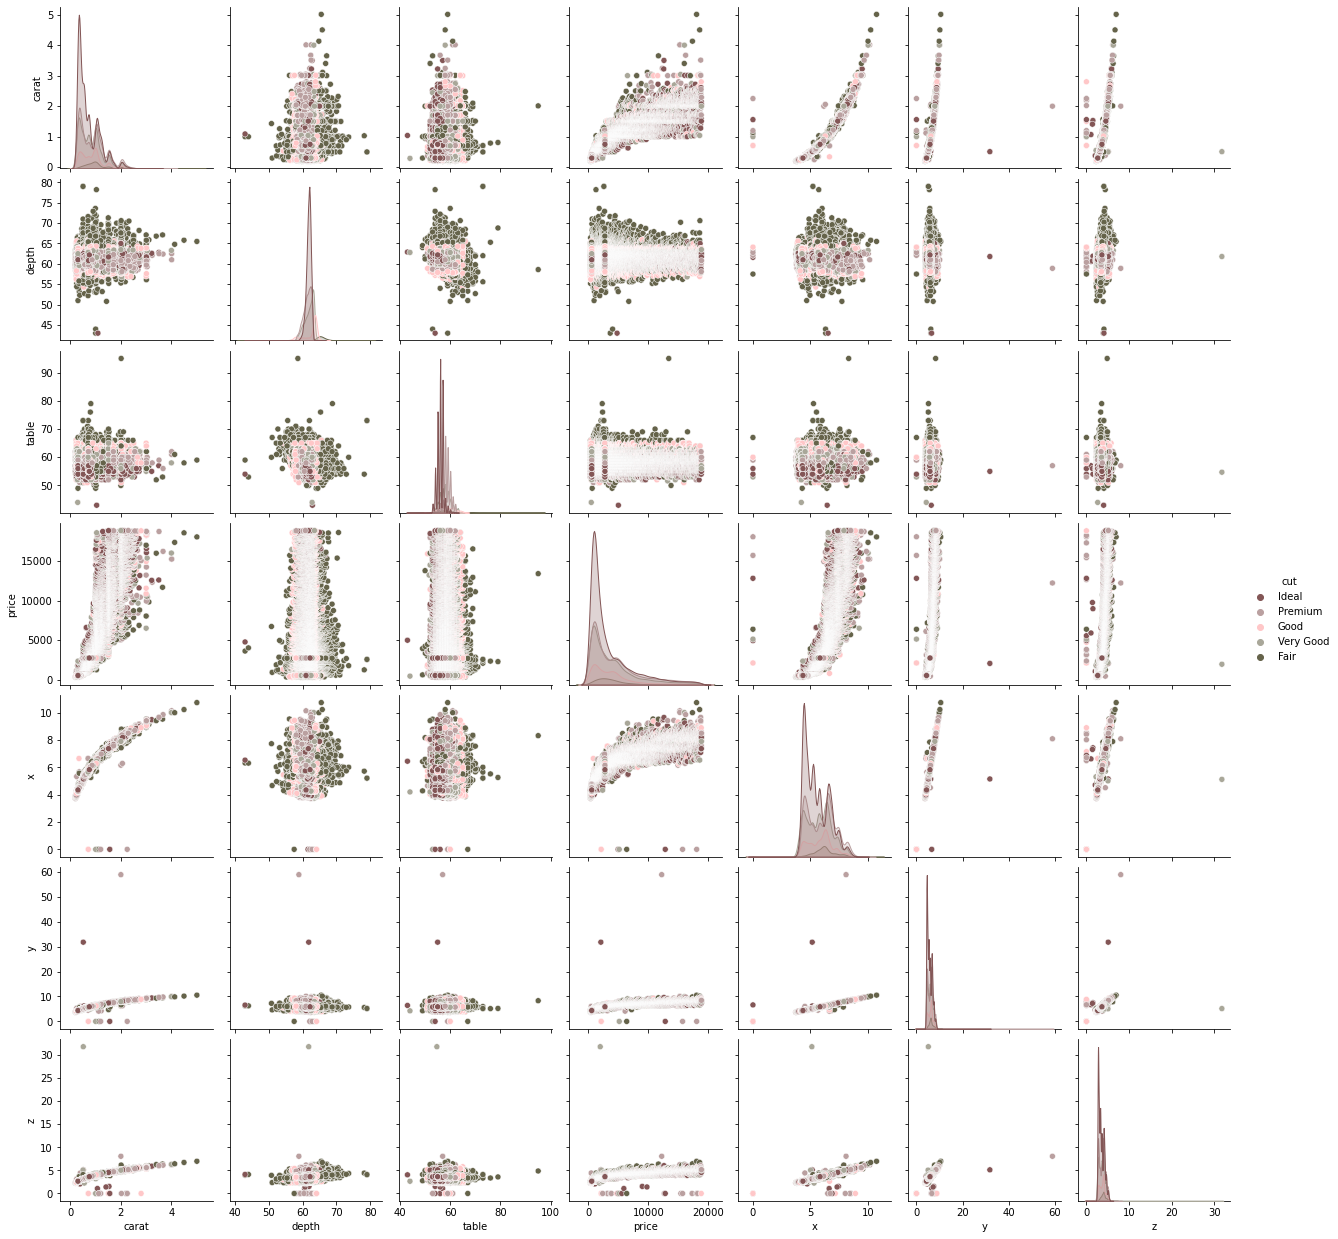

In [5]:
#Let's have a look at data 
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df, hue= "cut",palette=shade)
# I chose "cut" as hue. We can also examine other attributes in hue with less value count. 

Let us understand what the above graphs tell us and deduce a few key points from it
1) All our values for different cut styles are very distinct, we can notice the change in groups with different cut styles

2) As we discussed ealier, outliers can be dangerous for our datasets. It is very clear from our graphs that some attributes have outliers

3) Attributes y and z contain 0 value, which does not make any sense because we are dealing with solid objects but presence of 0 in x,y or z might make it a 2-dimensional or a 3-dimensional object

Text(0.5, 1.0, 'Regression Line on Price vs table')

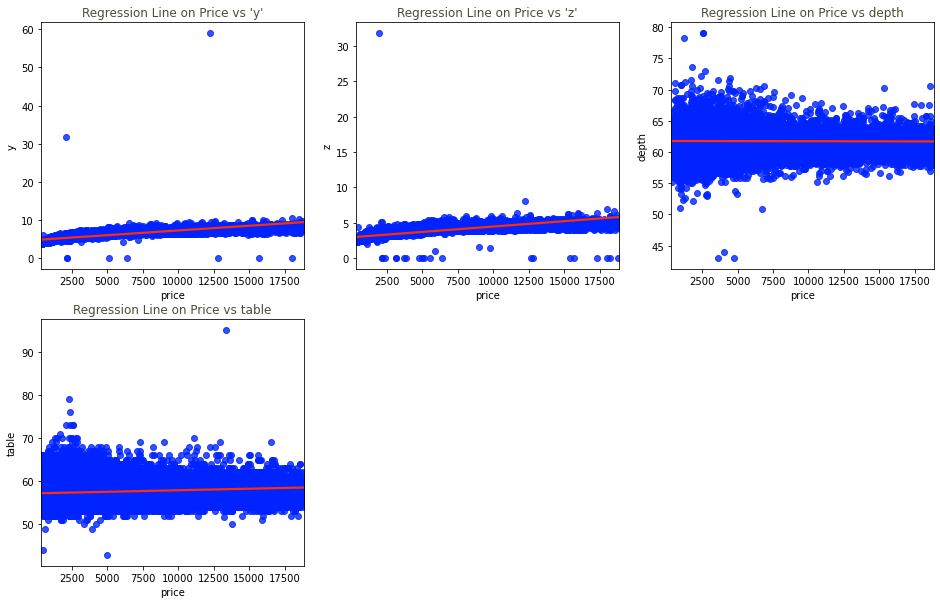

In [6]:
#Let us work with this deductions and improve our dataset

plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "#0023FF"}, line_kws={"color": "#FF2D00"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

plt.subplot(2,3,2)
ax = sns.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "#0023FF"}, line_kws={"color": "#FF2D00"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

plt.subplot(2,3,3)
ax = sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#0023FF"}, line_kws={"color": "#FF2D00"})
ax.set_title("Regression Line on Price vs depth", color="#4e4c39")

plt.subplot(2,3,4)
ax = sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#0023FF"}, line_kws={"color": "#FF2D00"})
ax.set_title("Regression Line on Price vs table", color="#4e4c39")

In [7]:
#It is very clear that there are a few outliers in our attributes. There are zero values, as well as some extreme values in 
#our attribute. Since we have a huge dataset, it would be easier to drop these rows instead of scaling them.


#Dropping these outliers
preprocessed_data = df[(df["x"]<30)]
preprocessed_data = df[(df["y"]<30)]
preprocessed_data = df[(df["z"]<30)&(df["z"]>2)]
preprocessed_data = df[(df["table"]<80)&(df["table"]>40)]
preprocessed_data= df[(df["depth"]<75)&(df["depth"]>45)]
preprocessed_data.shape

(53934, 10)

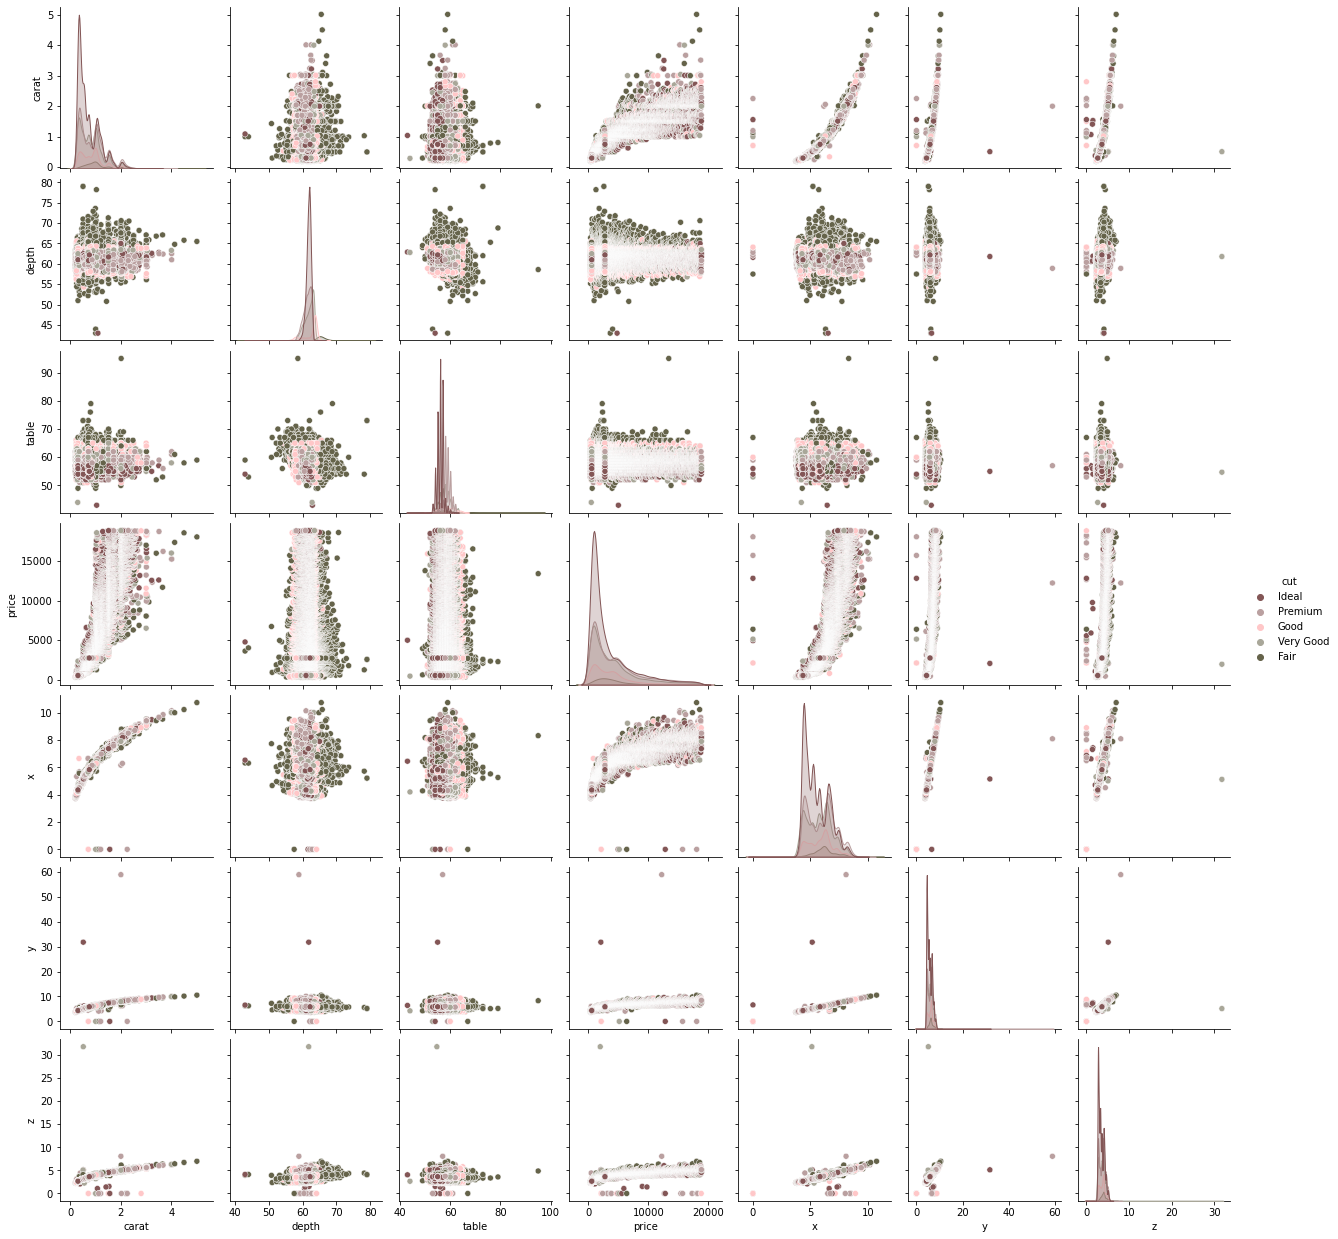

In [8]:
#Let's have a look at data 
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df, hue= "cut",palette=shade)

In [9]:
#An important part of data preprocessing is to know your categorical variables. Sometimes data might already be categorized
#and in numeric format but not continuous, make sure to convert them to object type as we are considering them as categorical
#vaiables

#In our dataset there are no numeric categorical values so we will find out which columns are not numeric by filtering out 
#the object datatype attributes


# Get list of categorical variables
s = (preprocessed_data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


<AxesSubplot:xlabel='clarity', ylabel='count'>

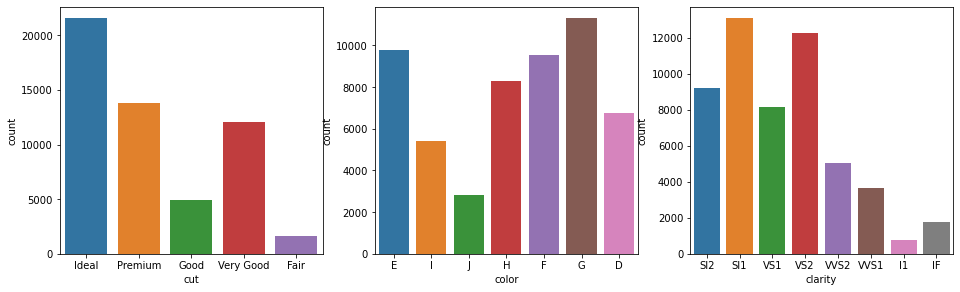

In [10]:
#We have three categorical attributes. Let us explore this columns

plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.countplot(preprocessed_data['cut'])
plt.subplot(2,3,2)
sns.countplot(preprocessed_data['color'])
plt.subplot(2,3,3)
sns.countplot(preprocessed_data['clarity'])

In [11]:
#Our data looks well distributed, lets convert these categorical variabels to numeric by using sklearns LabelEncoder model

from sklearn.preprocessing import LabelEncoder

# Now we apply this label encoder to resolve our caaategorical data
le = LabelEncoder()
for col in object_cols:
    preprocessed_data[col] = le.fit_transform(preprocessed_data[col])
preprocessed_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


As we can see, our data is now all in numeric format. This makes our model building easier. In projects of such types, our best bet is using regression models. But we will still try out some models to know which one suits our dataset the best

<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Model Selection</center></h3> 

In [12]:
#There are many machone learning models we can use on our datasets. Different models give different results and differenciate
#in their f1 scores, AUC score and training accuracy

#Since selecting a model might be difficult for many beginners, we are provided with a library  LazyPredict which does the 
#job for us

#In order to build  a model we must split our datasets(preferably in 80-20 split), one for training the model and other for 
#testing the model. The model trains on the information provided by the training dataset and tests itself on data it has
#never seen which we will be storing in our test data. To split our data we will use the train_test_split module from
#sklearn library

from sklearn.model_selection import train_test_split

#Let us separate our target attribute from our independant attributes
X= preprocessed_data.drop(["price"],axis =1)
y= preprocessed_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7) #I have split this into 75-25 ratio


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Building pipelines of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1353.629694 
DecisionTree: -765.393214 
RandomForest: -558.560633 
KNeighbors: -841.550854 
XGBRegressor: -553.692800 


<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Model Testing</center></h3> 

In [14]:
#XBGRegressor model has the best scoring of root mean squared error
predictions = pipeline_xgb.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predictions))
#R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent 
#variable that's explained by an independent variable or variables in a regression model
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predictions))
#The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. 
#It measures accuracy for continuous variables.
print("MSE:",metrics.mean_squared_error(y_test, predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2: 0.9814052706248098
Adjusted R^2: 0.9813928502177757
MAE: 281.4756109056046
MSE: 293691.36221353366
RMSE: 541.9329868291223


<a id="2"></a>
<h3 style='background:#b9f2ff; border:0; color:black'><center>Model Improvement</center></h3> 

In [16]:
#One ways of improving your machine learning model is by tuning the parameters of our model. Many times this is helpful in
#increasing the margin of accuracy

#from sklearn.model_selection import GridSearchCV

#XGBoost hyper-parameter tuning
#def hyperParameterTuning(X_train, y_train):
 #   param_tuning = {
  #      'learning_rate': [0.01, 0.1],
   #     'max_depth': [3, 5, 7, 10],
    #    'min_child_weight': [1, 3, 5],
     #   'subsample': [0.5, 0.7],
      #  'colsample_bytree': [0.5, 0.7],
       # 'n_estimators' : [100, 200, 500],
        #'objective': ['reg:squarederror']
    #}

    #xgb_model = XGBRegressor()

    #gsearch = GridSearchCV(estimator = xgb_model,
                           #param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           #cv = 5,
                           #n_jobs = -1,
                           #verbose = 1)

    #gsearch.fit(X_train,y_train)

    #return gsearch.best_params_

#hyperParameterTuning(X_train, y_train)

After tuning our model, let us see if it has improved our r sqaured score than it was without tuning
The best parameters result of gridsearch hyperparameter tuning are - {'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}
 
We will train our model with these parameters so that we don't have to repeat the tuning process when we run our kernel again

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 10,
        min_child_weight = 5,
        n_estimators = 5000,
        subsample = 0.7)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("MAE: ", mae_xgb)

Wall time: 18.4 s
MAE:  266.59373211811146


In [18]:
predictions1 = xgb_model.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predictions1))
#R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent 
#variable that's explained by an independent variable or variables in a regression model
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predictions1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predictions1))
#The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. 
#It measures accuracy for continuous variables.
print("MSE:",metrics.mean_squared_error(y_test, predictions1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

R^2: 0.9826702266634506
Adjusted R^2: 0.9826586511877174
MAE: 266.59373211811146
MSE: 273712.22432813025
RMSE: 523.1751373375174


The tuned model indicate that 98.2% of the variance of the dependent variable being studied is explained by the variance of the independent variable. Let us see what our results finally are...

In [19]:
predicted_tuned_values= pd.DataFrame({'Actual': y_test, 'Predicted': xgb_model.predict(X_test)})
predicted_tuned_values.to_csv("final_predictions_with_tuning.csv", index=True)
predicted_tuned_values

,Actual,Predicted
4573,3648,3244.059814
20771,9009,9344.847656
33218,821,884.333862
15628,6271,6281.777832
7718,580,530.459106
...,...,...
1501,2993,2730.955811
53829,2737,2653.367920
25028,640,684.937622
35627,473,500.338928
